# Feature Transformation

In this notebook, we'll further look at the ditribution of the features in our data and perform some approprite transformations if needed to better suit our predictor models.

Similar to the ['initial_EDA]('initial_EDA.ipynb') notebook, we'll look at the groups of similar features in our analysis.

Features 'SEX', 'EDUCATION', 'MARRIAGE' do not need to be transformed, as they are categorical features in essence, so the first we'll look at is 'LIMIT_BAL'.

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import scipy.stats
sns.set()
%matplotlib inline

In [2]:
def read_data(path):
    df = pd.read_excel(path, header=0)

    df.columns = df.iloc[0,:]

    df.rename(index=str, columns={"default payment next month": "Y"}, inplace=True)

    y = df.Y

    df.drop('ID', inplace=True, axis = 0)
    y.drop('ID', inplace=True, axis = 0)
    df.drop(columns = 'Y', inplace = True)
    df = df.astype('int32')
    y = y.astype('int32')
    
    #replace 'PAY_0' with 'PAY_1' in order to allign with 'BILL_AMT1' and 'PAY_AMT1'
    df.rename(index=str, columns = {'PAY_0': 'PAY_1'}, inplace=True)

    return df,  y

df, y= read_data('../default_of_credit_card_clients.xls')
df.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [4]:
df = pd.concat([df, y], axis = 1)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,1
3,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,0
4,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,0


In [5]:
#change the 'EDUCATION' values
df['EDUCATION'] = df['EDUCATION'].replace({1: 'Graduate School', 2: 'University', 3: 'Other', 4: 'Other', 5: 'Other', 6: 'Other', 0: 'Other'})

#change the 'SEX' values
df['SEX'] = df['SEX'].replace({1: 'Male', 2:'Female'})

#change the 'MARRIAGE' values
df['MARRIAGE'] = df['MARRIAGE'].replace({2: 'Non-married', 1: 'Married', 3: 'Non-married', 0: 'Non-married'})

df = pd.get_dummies(df)
df.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_Female,SEX_Male,EDUCATION_Graduate School,EDUCATION_Other,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Non-married
1,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,1,0,0,0,1,1,0
2,120000,26,-1,2,0,0,0,2,2682,1725,...,1000,0,2000,1,0,0,0,1,0,1
3,90000,34,0,0,0,0,0,0,29239,14027,...,1000,1000,5000,1,0,0,0,1,0,1
4,50000,37,0,0,0,0,0,0,46990,48233,...,1100,1069,1000,1,0,0,0,1,1,0
5,50000,57,-1,0,-1,0,0,0,8617,5670,...,9000,689,679,0,1,0,0,1,1,0


/opt/tljh/user/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/opt/tljh/user/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


the shaprio score before transformation is 0.9073493480682373, the p-value is 0.0
the shapiro score after transformation is 0.9774037003517151, the p-value is 0.0


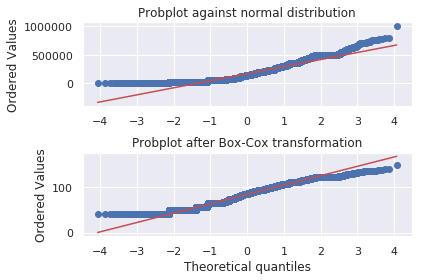

In [6]:
#LIMIT_BAL:

from scipy import stats 

shapiro_score = stats.shapiro(df['LIMIT_BAL'])

print(f"the shaprio score before transformation is {shapiro_score[0]}, the p-value is {shapiro_score[1]}")


fig = plt.figure()
ax1 = fig.add_subplot(211)
x = df['LIMIT_BAL']
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')


ax2 = fig.add_subplot(212)
xt, _ = stats.boxcox(x)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

shapiro_score_x = stats.shapiro(xt)
plt.tight_layout()

print(f"the shapiro score after transformation is {shapiro_score_x[0]}, the p-value is {shapiro_score_x[1]}")

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_Female,SEX_Male,EDUCATION_Graduate School,EDUCATION_Other,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Non-married
1,49.082137,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,1,0,0,0,1,1,0
2,81.542722,26,-1,2,0,0,0,2,2682,1725,...,1000,0,2000,1,0,0,0,1,0,1
3,75.229192,34,0,0,0,0,0,0,29239,14027,...,1000,1000,5000,1,0,0,0,1,0,1
4,63.745199,37,0,0,0,0,0,0,46990,48233,...,1100,1069,1000,1,0,0,0,1,1,0
5,63.745199,57,-1,0,-1,0,0,0,8617,5670,...,9000,689,679,0,1,0,0,1,1,0


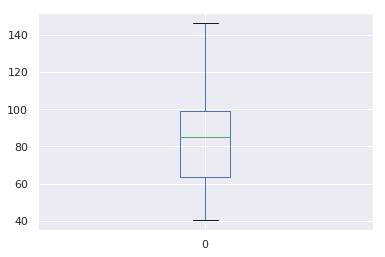

In [7]:
pd.DataFrame(xt).plot(kind='box')
df['LIMIT_BAL'] = xt

df.head()

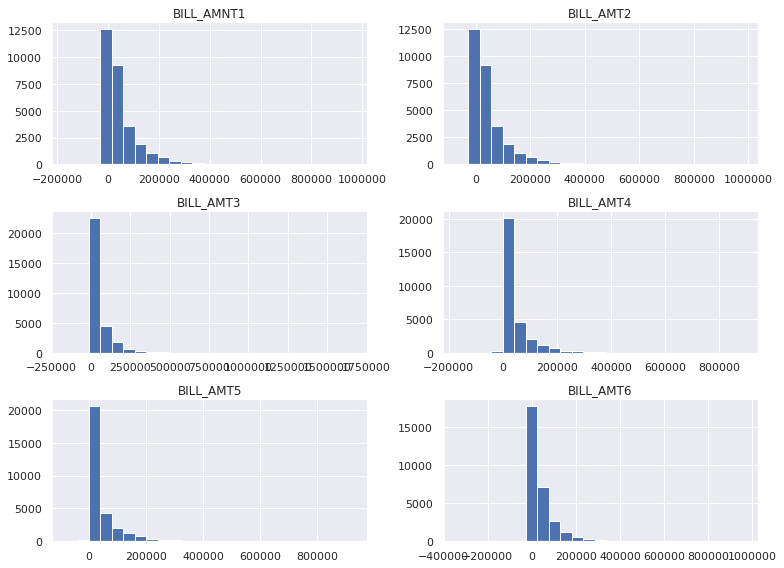

In [8]:
#create bill_amnts group
fig = plt.figure(figsize = (11,8))
bill_amts = df.loc[:, 'BILL_AMT1':'BILL_AMT6']


plt.subplot(3,2,1)
ax1 = bill_amts['BILL_AMT1'].hist(bins=25)
ax1.set_title('BILL_AMNT1')

plt.subplot(3,2,2)
ax2 = bill_amts['BILL_AMT2'].hist(bins=25)
ax2.set_title('BILL_AMT2')

plt.subplot(3,2,3)
ax3 = bill_amts['BILL_AMT3'].hist(bins=25)
ax3.set_title('BILL_AMT3')

plt.subplot(3,2,4)
ax4 = bill_amts['BILL_AMT4'].hist(bins=25)
ax4.set_title('BILL_AMT4')

plt.subplot(3,2,5)
ax5 = bill_amts['BILL_AMT5'].hist(bins=25)
ax5.set_title('BILL_AMT5')

plt.subplot(3,2,6)
ax6 = bill_amts['BILL_AMT6'].hist(bins=25)
ax6.set_title('BILL_AMT6')

plt.tight_layout()

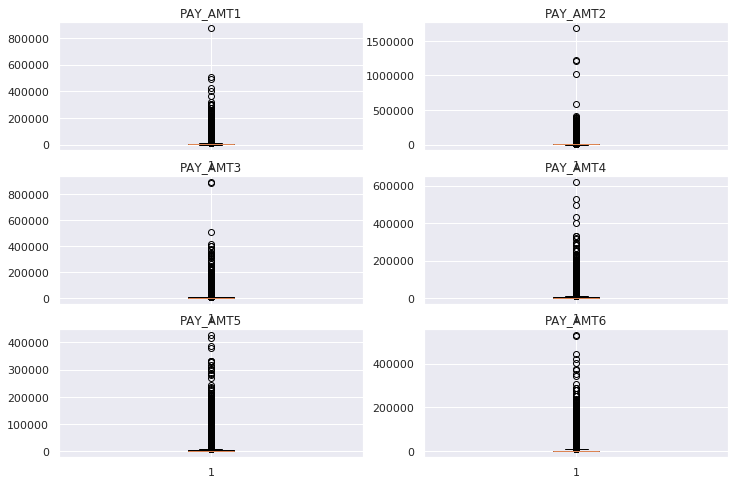

In [9]:
#create pay_amts group
pay_amts = df.loc[:, 'PAY_AMT1' : 'PAY_AMT6']

i = 1
plt.figure(figsize=(12,8))
for col in pay_amts:
    plt.subplot(3,2,i)
    plt.boxplot(pay_amts[col])
    plt.title(str(col))
    i +=1

In [10]:
df.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_Female', 'SEX_Male',
       'EDUCATION_Graduate School', 'EDUCATION_Other', 'EDUCATION_University',
       'MARRIAGE_Married', 'MARRIAGE_Non-married'],
      dtype='object')

## Column transformation strategies
We'll tranform the bill_amt columns and the pay_amt columns first starting with QuantileTransfomer 

Then try a power transformer

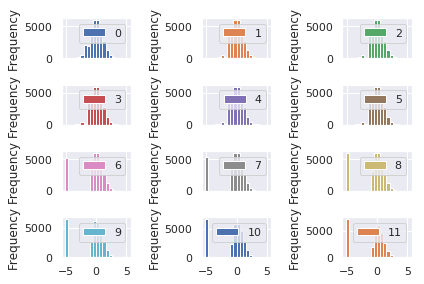

In [11]:
transform_columns = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer


quantile_transformer = QuantileTransformer(
    output_distribution='normal', random_state=2019)
transform_columns_df = quantile_transformer.fit_transform(df[transform_columns])

pd.DataFrame(transform_columns_df).plot(kind = 'hist', subplots = True, bins = 20, layout = (4,3))
plt.tight_layout()


#bill_columns_transformer = Pipeline(steps = [])

In [12]:
#replace the old columns in df with the newly transformed columns

df.loc[:, 'BILL_AMT1': 'PAY_AMT6'] = transform_columns_df

df.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_Female,SEX_Male,EDUCATION_Graduate School,EDUCATION_Other,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Non-married
1,49.082137,24,2,2,-1,-1,-2,-2,-0.648811,-0.666412,...,-5.199338,-5.199338,-5.199338,1,0,0,0,1,1,0
2,81.542722,26,-1,2,0,0,0,2,-0.748892,-0.803280,...,-0.245840,-5.199338,0.177827,1,0,0,0,1,0,1
3,75.229192,34,0,0,0,0,0,0,0.140851,-0.222909,...,-0.245840,-0.249721,0.826698,1,0,0,0,1,0,1
4,63.745199,37,0,0,0,0,0,0,0.393435,0.450791,...,-0.137177,-0.161281,-0.221344,1,0,0,0,1,1,0
5,63.745199,57,-1,0,-1,0,0,0,-0.407018,-0.515425,...,1.244778,-0.434928,-0.403356,0,1,0,0,1,1,0


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

print(scaler.fit(df))

df = scaler.transform(df)

df = pd.DataFrame(df)

df.columns =['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_Female', 'SEX_Male',
       'EDUCATION_Graduate School', 'EDUCATION_Other', 'EDUCATION_University',
       'MARRIAGE_Married', 'MARRIAGE_Non-married']

df.head()



MinMaxScaler(copy=True, feature_range=(0, 1))


,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_Female,SEX_Male,EDUCATION_Graduate School,EDUCATION_Other,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Non-married
0,0.083945,0.051724,0.4,0.4,0.1,0.1,0.0,0.0,0.437606,0.435914,...,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.388898,0.086207,0.1,0.4,0.2,0.2,0.2,0.4,0.427982,0.422752,...,0.476358,0.000000,0.517101,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.329585,0.224138,0.2,0.2,0.2,0.2,0.2,0.2,0.513545,0.478564,...,0.476358,0.475985,0.579500,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.221698,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,0.537835,0.543351,...,0.486808,0.484490,0.478714,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.221698,0.620690,0.1,0.2,0.1,0.2,0.2,0.2,0.460859,0.450434,...,0.619705,0.458175,0.461211,0.0,1.0,0.0,0.0,1.0,1.0,0.0


## Balance out the target

The target feature has an imbalance of its values; there are over 24,000 instances of class 0, but only roughly 6000 instances of class 1, so we are going to oversample our target in order to balance out the distribution of the two classes.

In [17]:
df = df.append(y, )

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT5,PAY_AMT6,SEX_Female,SEX_Male,EDUCATION_Graduate School,EDUCATION_Other,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Non-married,Y
0,0.083945,0.051724,0.4,0.4,0.1,0.1,0.0,0.0,0.437606,0.435914,...,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN
1,0.388898,0.086207,0.1,0.4,0.2,0.2,0.2,0.4,0.427982,0.422752,...,0.000000,0.517101,1.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN
2,0.329585,0.224138,0.2,0.2,0.2,0.2,0.2,0.2,0.513545,0.478564,...,0.475985,0.579500,1.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN
3,0.221698,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,0.537835,0.543351,...,0.484490,0.478714,1.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN
4,0.221698,0.620690,0.1,0.2,0.1,0.2,0.2,0.2,0.460859,0.450434,...,0.458175,0.461211,0.0,1.0,0.0,0.0,1.0,1.0,0.0,NaN


In [ ]:
y.value_counts().plot(kind = 'bar')

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(df, y, random_state = 2019)

#begin oversampling
oversample = pd.concat([X_train,y_train],axis=1)
oversample.head()
#max_size = oversample['Y'].value_counts().max()
#lst = [oversample]
 #   for class_index, group in oversample.groupby('Y2'):
  #      lst.append(group.sample(max_size-len(group), replace=True))
   # X2_train = pd.concat(lst)
    #y2_train=pd.DataFrame.copy(X2_train['Y2'])
    #del X2_train['Y2']

#clf = GaussianNB()

#clf.fit(X_train, y_train)

#y_pred = clf.predict(X_test)

#accuracy = accuracy_score(y_test, y_pred)

#conf_matrix = confusion_matrix(y_test, y_pred)

#print(f"accuracy of model: {accuracy}")

#print(f"confusion martix: \n {conf_matrix}")
    

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(cv = 5, random_state = 2019, n_jobs=-1)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

print(f"accuracy of model: {accuracy}")

print(f"confusion martix: \n {conf_matrix}")
      
      
        
   




